# World Happiness Report
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.
- GDP per Capita
- Family
- Life Expectancy (Health)
- Freedom
- Generosity
- Trust Government Corruption

## 1. Import Packages 

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# some settings for displaying Pandas results
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

## 2. Load Data

In [3]:
# Dataset path
dataset = "../project_3/data"

In [4]:
# List of database
for file in os.listdir(dataset):
    if file.endswith(".csv"):
        print(os.path.join(dataset, file))

../project_3/data/2019.csv
../project_3/data/2018.csv
../project_3/data/2015.csv
../project_3/data/2016.csv
../project_3/data/2017.csv


In [5]:
df_2015 = pd.read_csv(os.path.join(dataset, '2015.csv'))
df_2016 = pd.read_csv(os.path.join(dataset, '2016.csv'))
df_2017 = pd.read_csv(os.path.join(dataset, '2017.csv'))
df_2018 = pd.read_csv(os.path.join(dataset, '2018.csv'))
df_2019 = pd.read_csv(os.path.join(dataset, '2019.csv'))

In [6]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.0341,1.3965,1.3495,0.9414,0.6656,0.4198,0.2968,2.5174
1,Iceland,Western Europe,2,7.561,0.0488,1.3023,1.4022,0.9478,0.6288,0.1414,0.4363,2.7020
2,Denmark,Western Europe,3,7.527,0.0333,1.3255,1.3606,0.8746,0.6494,0.4836,0.3414,2.4920
3,Norway,Western Europe,4,7.522,0.0388,1.4590,1.3310,0.8852,0.6697,0.3650,0.3470,2.4653
4,Canada,North America,5,7.427,0.0355,1.3263,1.3226,0.9056,0.6330,0.3296,0.4581,2.4518


In [7]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.4418,1.1637,0.7950,0.5794,0.4445,0.3617,2.7394
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.5273,1.1452,0.8630,0.5856,0.4120,0.2808,2.6946
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.4267,1.1833,0.8673,0.5662,0.1497,0.4768,2.8314
3,Norway,Western Europe,4,7.498,7.421,7.575,1.5774,1.1269,0.7958,0.5961,0.3578,0.3790,2.6646
4,Finland,Western Europe,5,7.413,7.351,7.475,1.4060,1.1346,0.8109,0.5710,0.4100,0.2549,2.8260


In [8]:
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.5944,7.4796,1.6165,1.5335,0.7967,0.6354,0.3620,0.3160,2.2770
1,Denmark,2,7.522,7.5817,7.4623,1.4824,1.5511,0.7926,0.6260,0.3553,0.4008,2.3137
2,Iceland,3,7.504,7.6220,7.3860,1.4806,1.6106,0.8336,0.6272,0.4755,0.1535,2.3227
3,Switzerland,4,7.494,7.5618,7.4262,1.5650,1.5169,0.8581,0.6201,0.2905,0.3670,2.2767
4,Finland,5,7.469,7.5275,7.4105,1.4436,1.5402,0.8092,0.6180,0.2455,0.3826,2.4302


In [9]:
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [10]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 3. Expore Data Analysis 

### 3.1. Rename columns 

In [11]:
df_2015.rename(columns = {'Happiness Rank': 'Rank',
                          'Happiness Score': 'Score',
                          'Economy (GDP per Capita)': 'GDP',
                          'Health (Life Expectancy)': 'Health',
                          'Trust (Government Corruption)': 'Trust',
                          }, inplace = True)
df_2016.rename(columns = {'Happiness Rank': 'Rank',
                          'Happiness Score': 'Score',
                          'Economy (GDP per Capita)': 'GDP',
                          'Health (Life Expectancy)': 'Health',
                          'Trust (Government Corruption)': 'Trust',
                          }, inplace = True)
df_2017.rename(columns = {'Happiness.Rank':'Rank',
                          'Happiness.Score':'Score',
                          'Economy..GDP.per.Capita.' : 'GDP',
                          'Health..Life.Expectancy.' : 'Health',
                          'Trust..Government.Corruption.' : 'Trust',
                           }, inplace = True)
df_2018.rename(columns = {'Overall rank' : 'Rank',
                          'Country or region' : 'Country',
                          'Score' : 'Score',
                          'Social support' : 'Family',
                          'GDP per capita' : 'GDP',
                          'Healthy life expectancy' : 'Health',
                          'Freedom to make life choices' :'Freedom',
                          'Perceptions of corruption' : 'Trust'
                          }, inplace = True)
df_2019.rename(columns = {'Overall rank' : 'Rank',
                          'Country or region' : 'Country',
                          'Score' : 'Score',
                          'Social support' : 'Family',
                          'GDP per capita' : 'GDP',
                          'Healthy life expectancy' : 'Health',
                          'Freedom to make life choices' :'Freedom',
                          'Perceptions of corruption' : 'Trust'
                          }, inplace = True)

### 3.2. Filter necessary columns 

In [12]:
selected_features = ['Rank', 'Country', 'Score', 'GDP',
                     'Family','Health', 'Freedom', 'Trust', 'Generosity']

In [13]:
filtered_2015 = df_2015.filter(selected_features)
filtered_2016 = df_2016.filter(selected_features)
filtered_2017 = df_2017.filter(selected_features)
filtered_2018 = df_2018.filter(selected_features)
filtered_2019 = df_2019.filter(selected_features)

### 3.3. Add 'Year' Column

In [14]:
filtered_2015.insert(0, "Year", 2015)
filtered_2016.insert(0, "Year", 2016)
filtered_2017.insert(0, "Year", 2017)
filtered_2018.insert(0, "Year", 2018)
filtered_2019.insert(0, "Year", 2019)

In [15]:
# Create dataset including all the data from all the years together.
df_summary = pd.concat([filtered_2015,filtered_2016,filtered_2017,filtered_2018,filtered_2019], 
                     sort = False, ignore_index=True)

### 3.4. Handle null values

In [16]:
df_summary.isnull().sum()

Year          0
Rank          0
Country       0
Score         0
GDP           0
Family        0
Health        0
Freedom       0
Trust         1
Generosity    0
dtype: int64

Just have one Null value at **Trust**. Let's check to see if this value is located and fill it with **mean** value of this feature.

In [17]:
df_summary[df_summary['Trust'].isnull()]

,Year,Rank,Country,Score,GDP,Family,Health,Freedom,Trust,Generosity
489,2018,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,NaN,0.186


In [18]:
mean_trust_value = df_summary[df_summary['Country'] == 'United Arab Emirates']['Trust'].mean()
mean_trust_value

0.3119823909258842

In [19]:
df_summary.fillna(mean_trust_value, inplace=True)

### 3.5. Finding Correlation between different columns with Happiness Score.

In [20]:
# Find correlations with the target and sort
correlations = df_summary.corr()['Score'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(5))
print('Most Negative Correlations:\n', correlations.head(5))

Most Positive Correlations:
 Freedom    0.5513
Family     0.6488
Health     0.7425
GDP        0.7893
Score      1.0000
Name: Score, dtype: float64
Most Negative Correlations:
 Rank         -0.9921
Year          0.0071
Generosity    0.1376
Trust         0.4000
Freedom       0.5513
Name: Score, dtype: float64


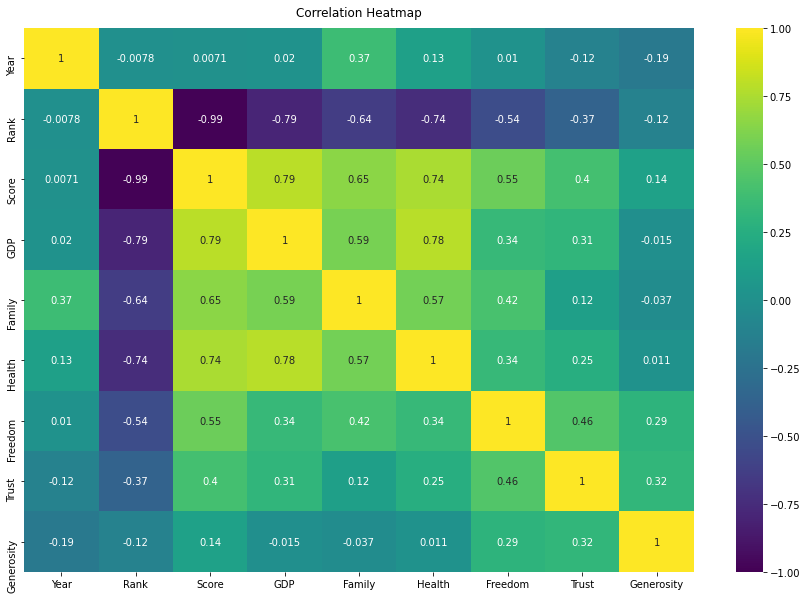

In [21]:
plt.figure(figsize=(15,10))
corr_mat = sns.heatmap(df_summary.corr(), vmin=-1, vmax=1, annot=True, cmap='viridis')
corr_mat.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('../project_3/images/{}.png'.format('correlation_heatmap'), dpi=300, bbox_inches='tight')

Look at the correlation chart, we can see that Generosity and Trust in Government has less impact to the individual happiness. The correlation analysis revealed a strong relationship among Happiness, Economy, Family, Freedom and Health.

##  4. Let's check it out with data analysis and visualization

### 4.1. Top 10 Countries happiest over years and VietNam 
Take the list of the 10 happiest countries in 2015 and see how the rankings change over years. Where is ranking of Vietnam?

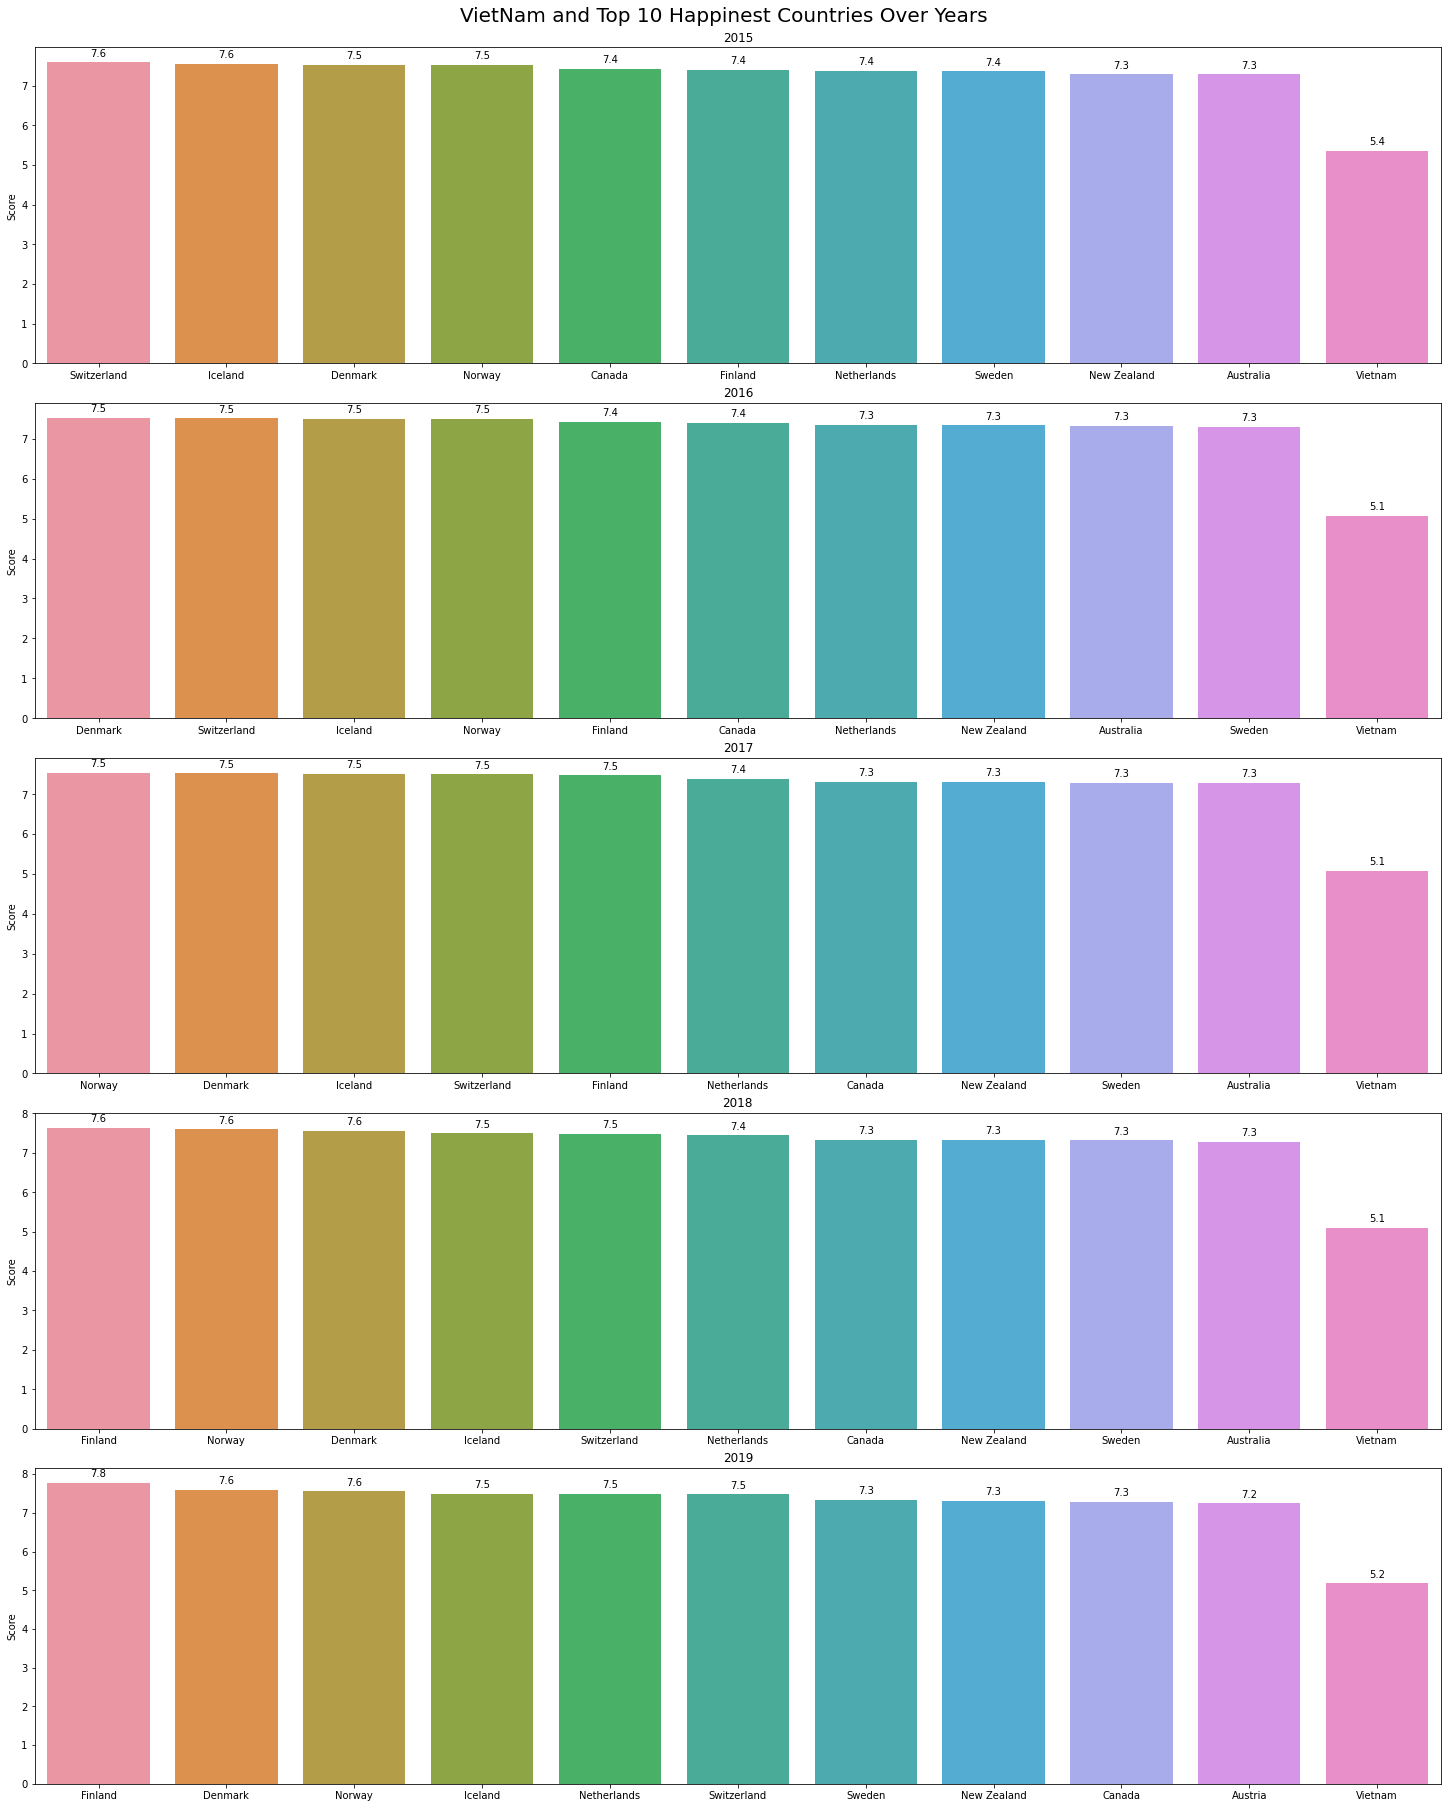

In [92]:
fig = plt.figure(figsize=(20, 25), constrained_layout=True)
for i, year in enumerate(df_summary['Year'].unique()):
    x = df_summary[df_summary['Year'] == year].head(10).append(df_summary[(df_summary['Year'] == year) & (df_summary['Country'] == 'Vietnam')])['Country'].values
    y = df_summary[df_summary['Year'] == year].head(10).append(df_summary[(df_summary['Year'] == year) & (df_summary['Country'] == 'Vietnam')])['Score'].values
    ax = fig.add_subplot(5, 1, i+1)
    ax = sns.barplot(x, y)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    ax.set_title(year)
    ax.set_ylabel('Score')
fig.suptitle('VietNam and Top 10 Happinest Countries Over Years', fontsize=20)
plt.savefig('../project_3/images/{}.jpg'.format('top_10_countries_and_vietnam'), dpi=300, bbox_inches='tight')
plt.show()

- As you can see, in 2015, Finland was in 6th place. 2 years later, 2017-2018, Finland climbed to 6th. And surprisingly, Findland held the top spot for 2 years consecutive (2018-2019). A spectacular breakout.
- Besides, Switzelend, Norway, Demark, Iceland constantly change positions for each other.
- Top 10 Happinest Countries always have Happniess Score greater than 7.0. Meanwhile, Vietnam has a mean value (5.1 - 5.2).

### Let's check the ranking of Vietnam over years.

- It can be seen that Vietnam has dropped significantly in rankings, from 75th to 94th. 
- Although Vietnam's happiness score has not changed much, it is understandable that other countries have an increase in happiness scores.

Text(0.5, 1.0, "Vietnam's Ranking for each variable")

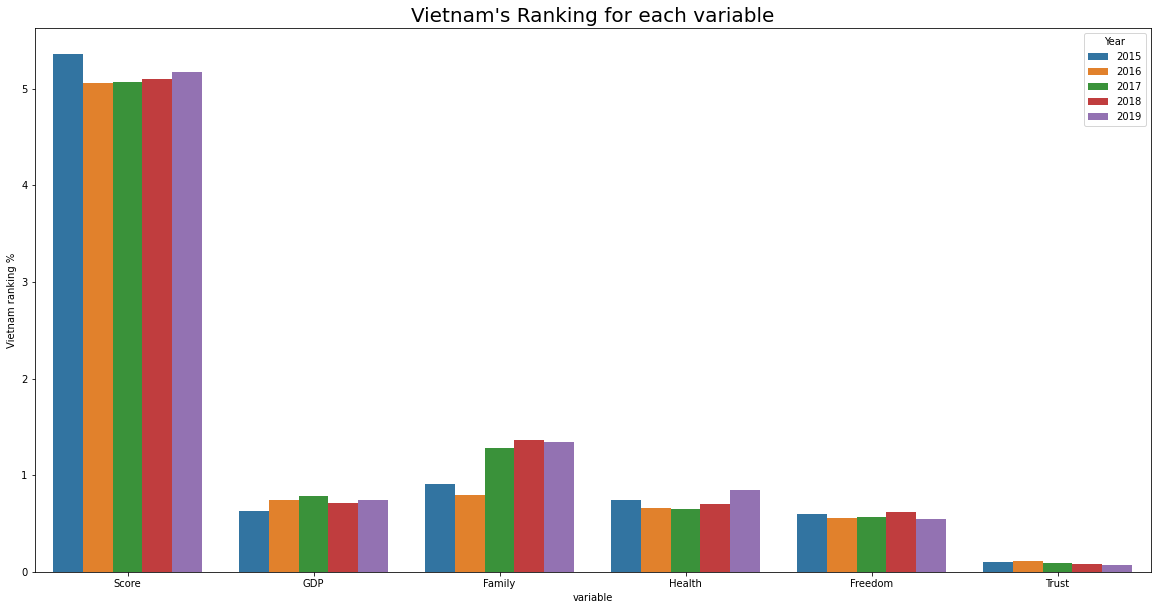

In [135]:
# Vietnam
vietnam=df_summary.loc[df_summary['Country']=='Vietnam']
fig, ax = plt.subplots(figsize=(20,10))
brdf = pd.melt(vietnam.iloc[:,[0,3,4,5,6,7,8]],'Year')
sns.barplot(data=brdf,x='variable',y='value',hue='Year')
plt.ylabel('Vietnam ranking %')
ax.set_title("Vietnam's Ranking for each variable",fontsize=20)

Text(0.5, 1.0, "Vietnam's Ranking for each variable")

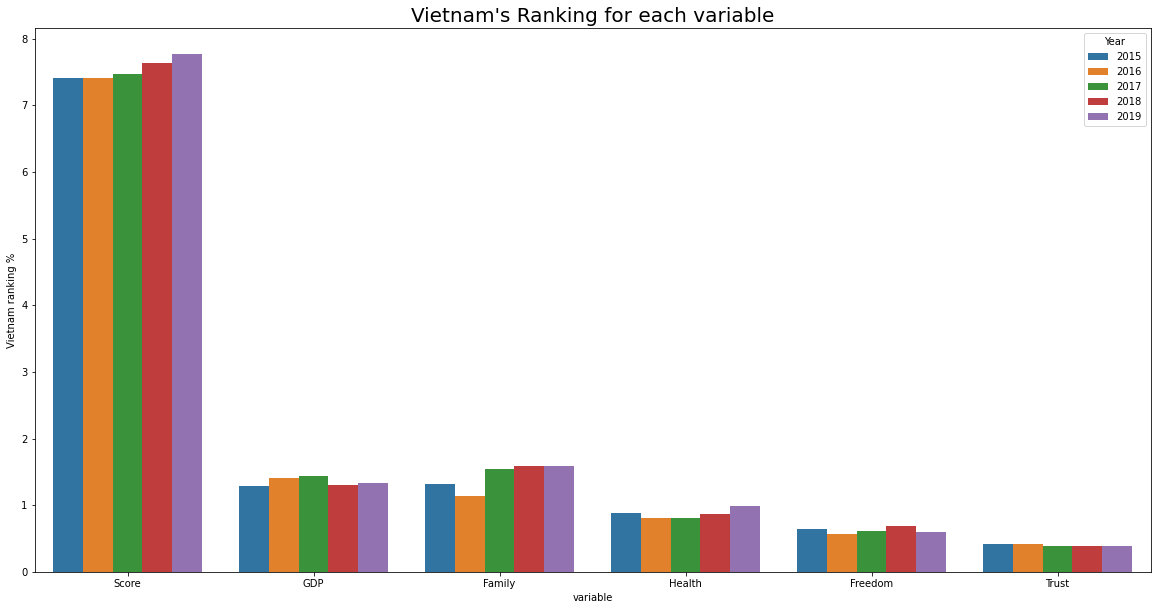

In [132]:
# Vietnam
findland=df_summary.loc[df_summary['Country']=='Finland']
fig, ax = plt.subplots(figsize=(20,10))
brdf = pd.melt(findland.iloc[:,[0,3,4,5,6,7,8]],'Year')
sns.barplot(data=brdf,x='variable',y='value',hue='Year')
plt.ylabel('Vietnam ranking %')
ax.set_title("Vietnam's Ranking for each variable",fontsize=20)

### 4.2. Correlation among features

In [ ]:
for i, col in enumerate(df_summary.columns):
    if col not in ['Year', 'Rank', 'Country', 'Score']:
        fig.add_subplot(3, 3, i)
        plt.figure( figsize=(15,5))
        plt.scatter(df_summary['Score'], df_summary[col])
        plt.title('Score vs {}'.format(col), fontsize=40, y=1.05)
        plt.grid()
        plt.xlabel('Score', fontsize=14)
        plt.ylabel(col, fontsize=14)
plt.show()

In [175]:
df_summary.head()

,Year,Rank,Country,Score,GDP,Family,Health,Freedom,Trust,Generosity
0,2015,1,Switzerland,7.587,1.3965,1.3495,0.9414,0.6656,0.4198,0.2968
1,2015,2,Iceland,7.561,1.3023,1.4022,0.9478,0.6288,0.1414,0.4363
2,2015,3,Denmark,7.527,1.3255,1.3606,0.8746,0.6494,0.4836,0.3414
3,2015,4,Norway,7.522,1.4590,1.3310,0.8852,0.6697,0.3650,0.3470
4,2015,5,Canada,7.427,1.3263,1.3226,0.9056,0.6330,0.3296,0.4581


### 4.3. Analysis 2019 Features

#### 4.3.1. Economy (GDP per Capita)

Text(0.5, 1.0, '10 countries with highest GDP')

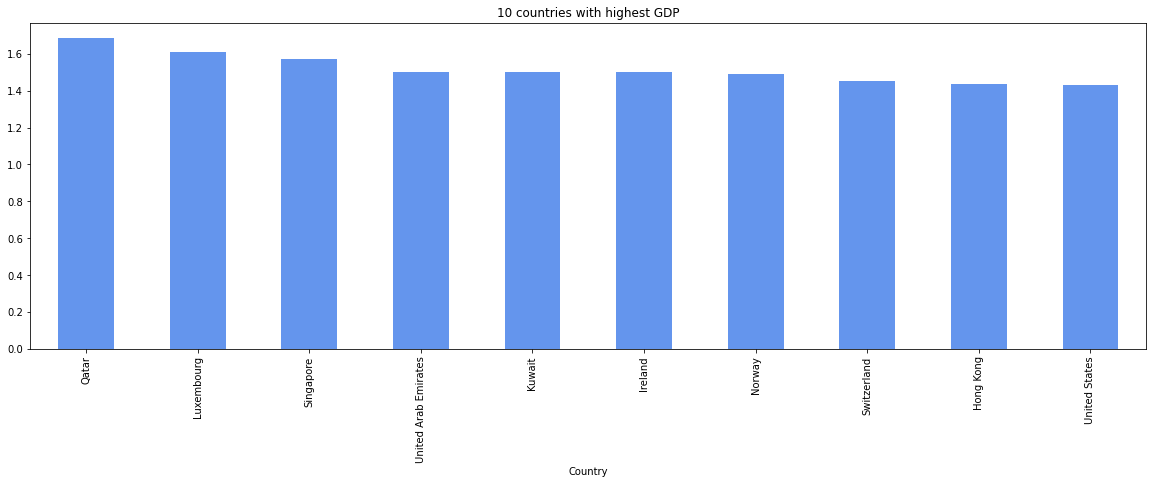

In [204]:
df_summary[df_summary['Year'] == 2019].groupby('Country')['GDP'].max().sort_values(ascending = False).head(10).plot(kind='bar', figsize=(20,6),color='cornflowerblue')
plt.title('10 countries with highest GDP')

#### 4.3.2. Family 

Text(0.5, 1.0, '10 countries with highest Family (Social Support)')

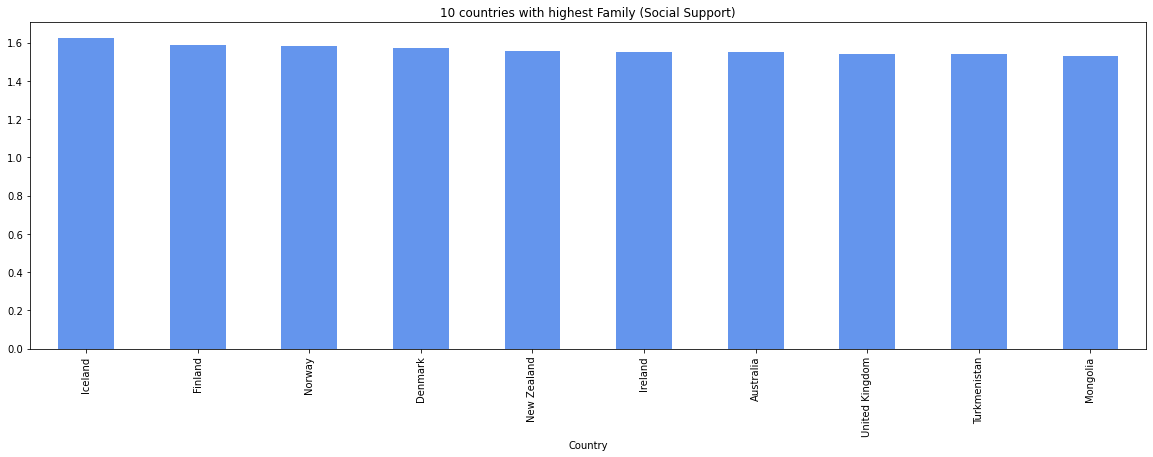

In [191]:
df_summary[df_summary['Year'] == 2019].groupby('Country')['Family'].max().sort_values(ascending = False).head(10).plot(kind='bar', figsize=(20,6),color='cornflowerblue')
plt.title('10 countries with highest Family (Social Support)')

#### 4.3.3. Health life expectancy

Text(0.5, 1.0, '10 countries with highest Health life expectancy')

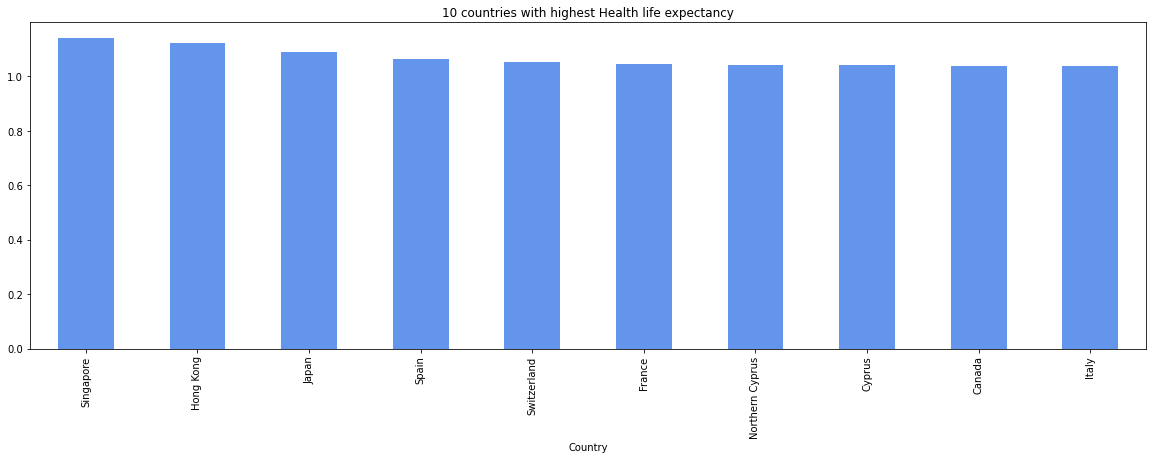

In [195]:
df_summary[df_summary['Year'] == 2019].groupby('Country')['Health'].max().sort_values(ascending = False).head(10).plot(kind='bar', figsize=(20,6),color='cornflowerblue')
plt.title('10 countries with highest Health life expectancy')

#### 4.3.4. Freedom

Text(0.5, 1.0, '10 countries with highest Freedom')

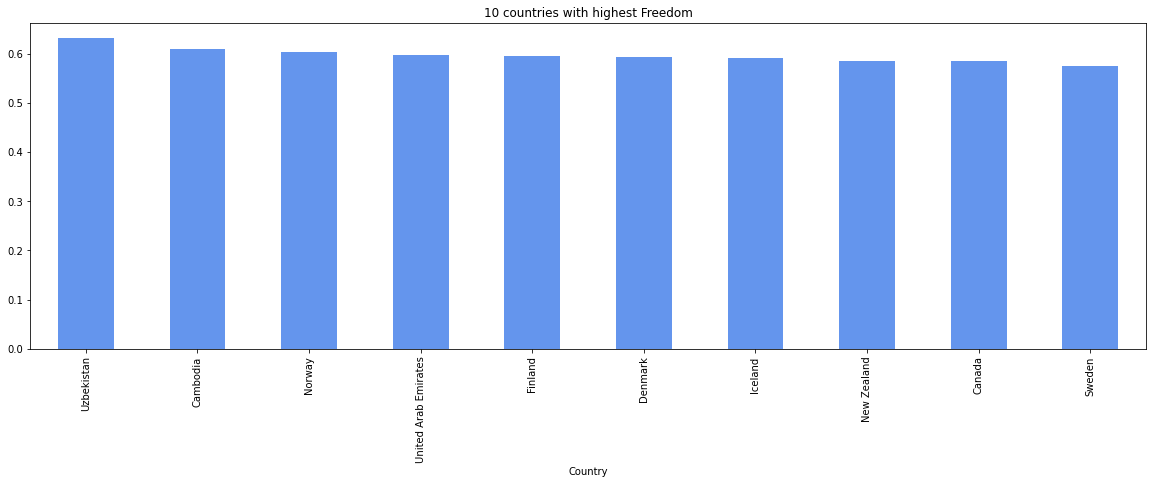

In [198]:
df_summary[df_summary['Year'] == 2019].groupby('Country')['Freedom'].max().sort_values(ascending = False).head(10).plot(kind='bar', figsize=(20,6),color='cornflowerblue')
plt.title('10 countries with highest Freedom')

#### 4.3.5. Trust (Government Corruption)

Text(0.5, 1.0, '10 countries with highest Trust (Government Corruption)')

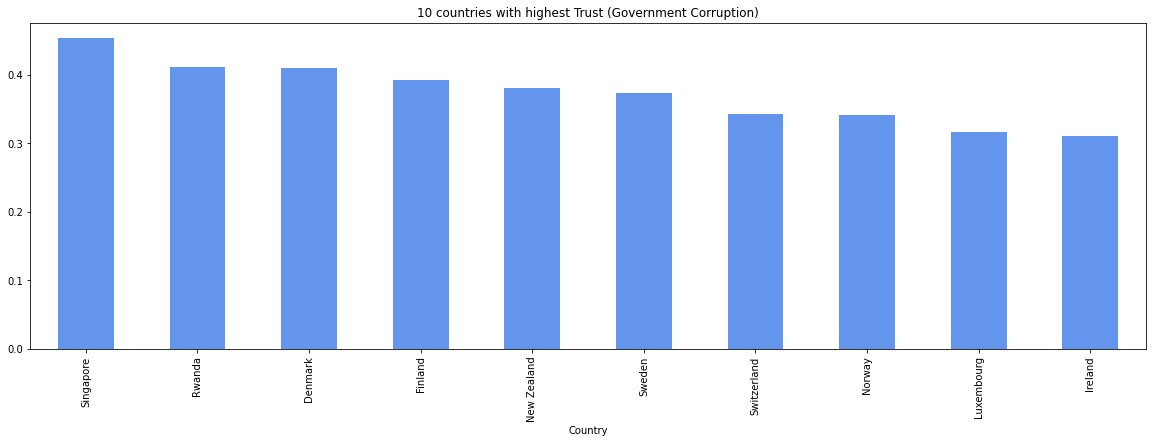

In [201]:
df_summary[df_summary['Year'] == 2019].groupby('Country')['Trust'].max().sort_values(ascending = False).head(10).plot(kind='bar', figsize=(20,6),color='cornflowerblue')
plt.title('10 countries with highest Trust (Government Corruption)')

#### 4.3.6. Generosity

Text(0.5, 1.0, '10 countries with highest Generosity')

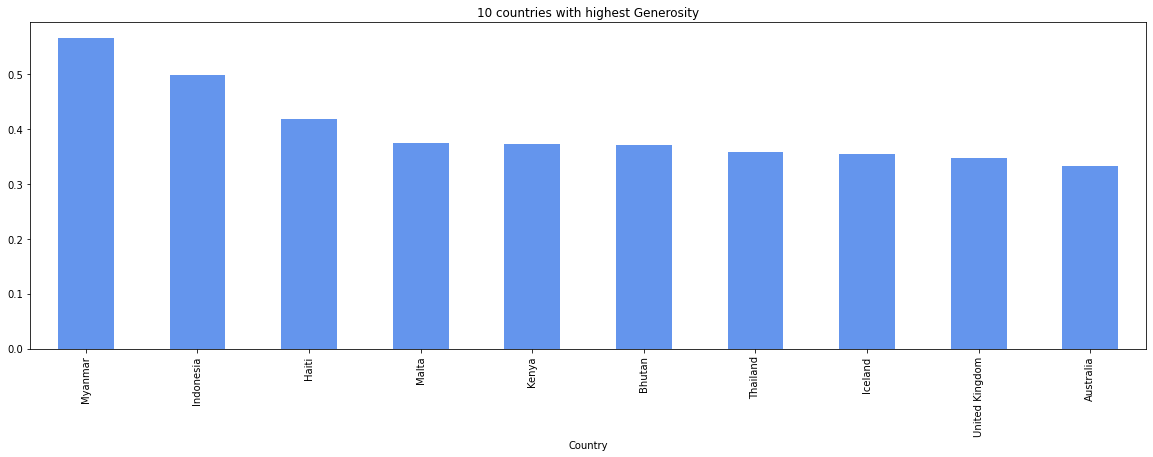

In [203]:
df_summary[df_summary['Year'] == 2019].groupby('Country')['Generosity'].max().sort_values(ascending = False).head(10).plot(kind='bar', figsize=(20,6),color='cornflowerblue')
plt.title('10 countries with highest Generosity')

# 5. Conclusion

- High life expectancy and health make you worry less about how you'll survive
- GDP per Capita is most important. Money can make our life better. 
- It can be seen that Family holds a very important role in the happiness of each person

Now, let's go and say words of love to your family. 